In [1]:
# pip install control

In [2]:
import control
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define transfer function of the system
s = control.tf('s')

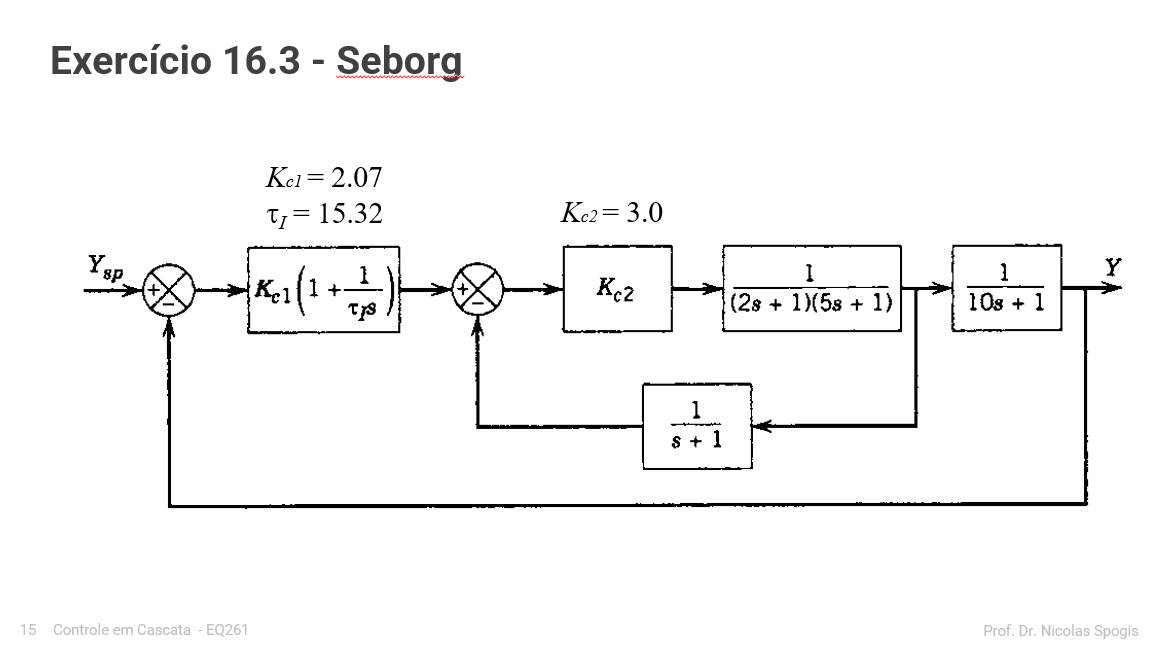

## Analisando o Loop Interno (Malha Aberta)

In [4]:
G1 = 1/((2*s+1)*(5*s+1))

In [5]:
t1, y1 = control.step_response(G1)

In [6]:
# Plot step response
plt.figure(1)
plt.plot(t1, y1)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Inner Loop Step Response - Open Loop')
plt.grid()
plt.show()

## Analisando o Loop Externo (Malha Aberta)

In [7]:
G2 = 1/(10*s+1)

In [8]:
t2, y2 = control.step_response(G2)

In [9]:
# Plot step response
plt.figure(2)
plt.plot(t2, y2)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Outer Loop Step Response - Open Loop')
plt.grid()
plt.show()

## Sistema com Controle Feedback Simples

In [10]:
Kc_Master = 2.07
ti_Master = 15.32

In [11]:
# Define transfer function of the PI Controller
Master_Control = Kc_Master*(1 + (1/(ti_Master*s)))

In [12]:
SYS = control.series(Master_Control, G1, G2)

In [13]:
Simple_Feedback_Controller = control.feedback(SYS, 1, sign=-1)

In [14]:
t3, y3 = control.step_response(Simple_Feedback_Controller)

In [15]:
# Plot step response
plt.figure(3)
plt.plot(t3, y3)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Simple Feedback Controller')
plt.grid()
plt.show()

# Cascade Control

**Para ter um sistema de controle em cascata eficaz, é essencial que a malha interna responda muito mais rápido que a malha externa.**

## Inner Loop (Slave)

In [16]:
Kc2 = 3.0

In [17]:
SYS_Inner = control.series(Kc2, G1)

In [18]:
Inner_Sensor = 1/(s+1)

In [19]:
Inner_Loop = control.feedback(SYS_Inner, Inner_Sensor, sign=-1)

## Master / Outer Controler -> Level

In [20]:
SYS_Outer = control.series(Master_Control, Inner_Loop, G2 )

In [21]:
Outer_Loop = control.feedback(SYS_Outer, 1, sign=-1)

In [22]:
t4, y4 = control.step_response(Outer_Loop)

In [23]:
# Plot step response
plt.figure(4)
plt.plot(t4, y4)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Cascade Controller')
plt.grid()
plt.show()